In [55]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [56]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
from sklearn.linear_model import LinearRegression

<h3>Project3 Dengue Analysis</h3>

In [58]:
dengue = pd.read_csv("Datasets\\dengue.csv")

In [59]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [60]:
dengue.isnull()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1015,False,False,False,False,False
1016,False,False,False,False,False
1017,False,False,False,False,False
1018,False,False,False,False,False


In [61]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [62]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [63]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [64]:
dengue['Month'] = dengue['Month'].astype('str')

In [65]:
dengue['Date'] = pd.to_datetime(dengue['Month'] + '-' + dengue['Year'].astype(str))

In [66]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()

In [67]:
dengue.dtypes

Month                    object
Year                      int64
Region                   object
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
dtype: object

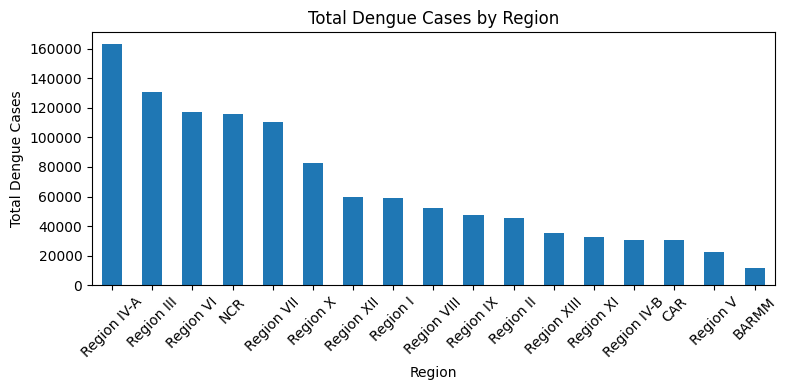

In [68]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
region_cases.plot(kind="bar")
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>INISIGHTS : Region IV-A has the highest number of dengue cases, which may be due to its large population, busy urban areas, and frequent rainy weather that creates more places for mosquitoes to breed. The high number of cases might also mean the region reports infections more accurately. Overall, this shows that Region IV-A needs stronger dengue prevention efforts, like cleaning surroundings, improving sanitation, and doing more community awareness activities.</h4>

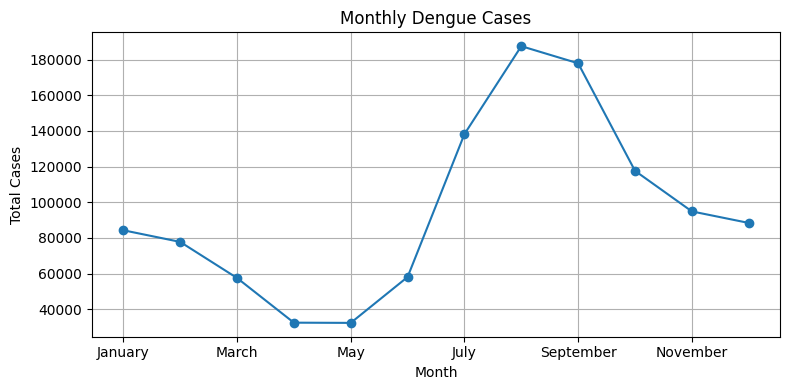

In [69]:

months = ["January","February","March","April","May","June",
          "July","August","September","October","November","December"]
dengue["Month"] = pd.Categorical(dengue["Month"], categories=months, ordered=True)

monthly_cases = dengue.groupby("Month")["Dengue_Cases"].sum()

plt.figure(figsize=(8,4))
monthly_cases.plot(kind="line", marker="o")
plt.title("Monthly Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>INSIGHTS :The highest number of dengue cases are usually during the rainy season, which creates more standing water where mosquitoes can easily breed. This increase in cases may also be caused by warm and humid weather that helps mosquitoes live longer. Meanwhile, the months with fewer cases often fall during the dry season, when mosquito breeding slows down. Overall, this pattern shows that communities need to prepare early for the rainy months by cleaning their surroundings, removing stagnant water, and strengthening dengue awareness and prevention activities.</h4>

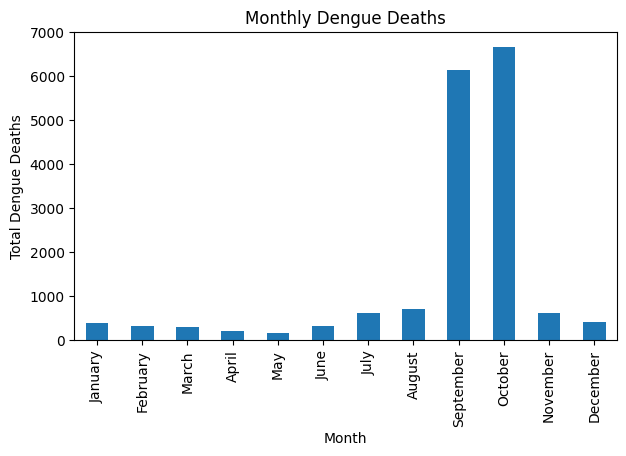

In [70]:
month_deaths = dengue.groupby("Month")["Dengue_Deaths"].sum()

plt.figure(figsize=(7,4))
month_deaths.plot(kind="bar")
plt.title("Monthly Dengue Deaths")
plt.xlabel("Month")
plt.ylabel("Total Dengue Deaths")
plt.show()

<h4>INSIGHTS : The months with more deaths often align with peak dengue transmission periods.</h4>

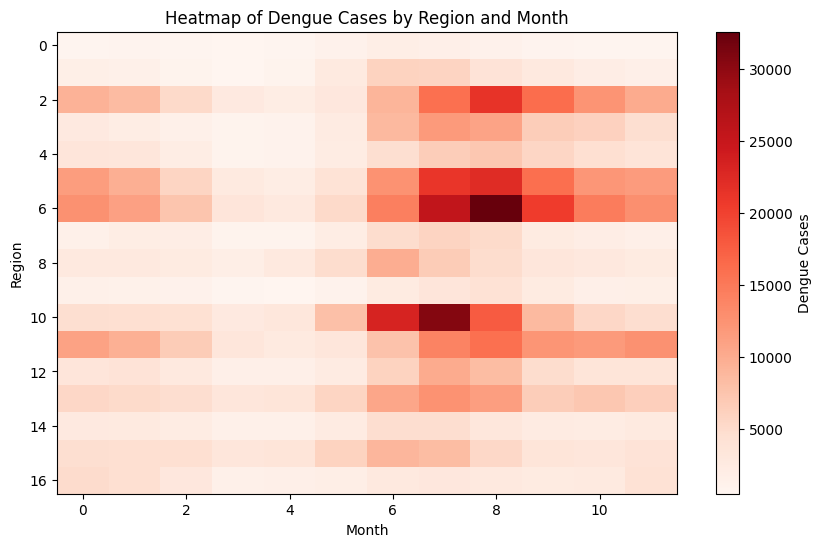

In [71]:
heat = dengue.pivot_table(values="Dengue_Cases", index="Region", columns="Month", aggfunc="sum")

plt.figure(figsize=(10,6))
plt.imshow(heat, cmap="Reds", aspect="auto")
plt.title("Heatmap of Dengue Cases by Region and Month")
plt.colorbar(label="Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Region")
plt.show()

<h4>INSIGHTS : Darker red areas reveal months and regions where dengue outbreaks are most intense.</h4>

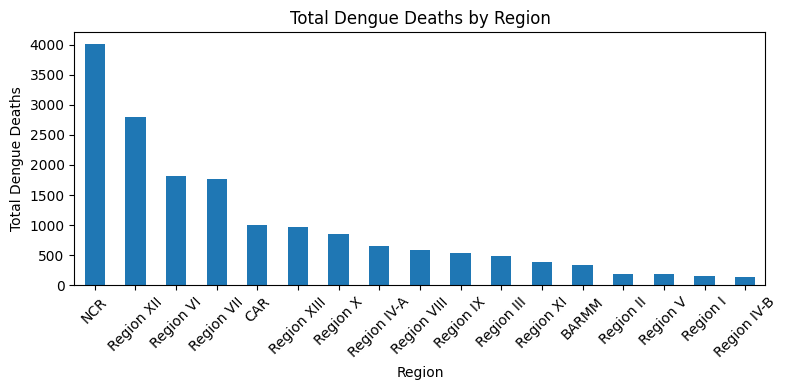

In [72]:
region_deaths = dengue.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
region_deaths.plot(kind="bar")
plt.title("Total Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>INSIGHTS : NCR has the highest deaths, and despite of having the highest dengue case Region IV-A has low dengue deaths. Regions with the highest deaths may need better hospital access, quicker case detection, and faster treatment response. </h4>

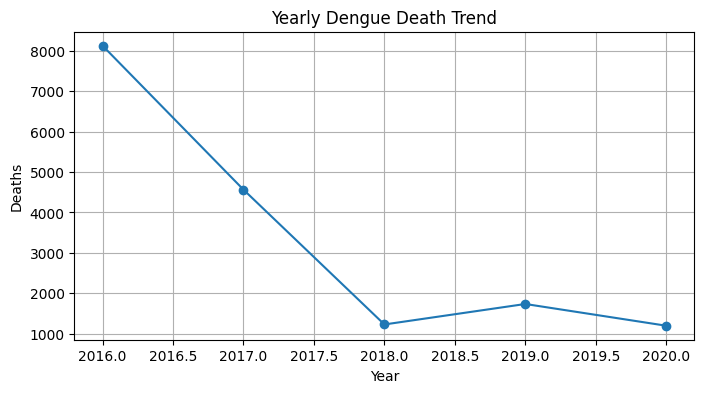

In [73]:
death_trend = dengue.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(8,4))
death_trend.plot(kind="line", marker="o")
plt.title("Yearly Dengue Death Trend")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()

<h4>INSIGHTS : Over time, dengue deaths decrease. This means that healthcare systems are improving in diagnosing, treating, and managing dengue cases. It also suggests that people are becoming more aware of dengue symptoms, seeking medical help earlier, and following prevention measures more effectively.</h4>

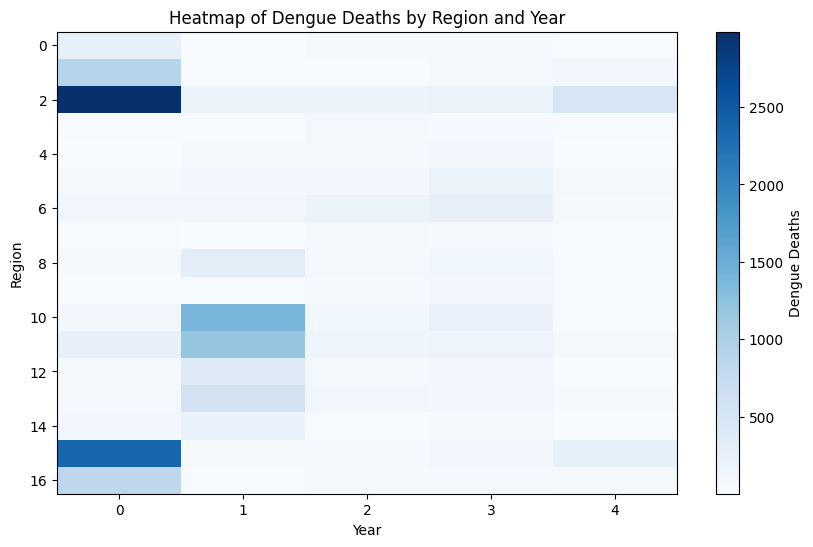

In [74]:
heat2 = dengue.pivot_table(values="Dengue_Deaths", index="Region", columns="Year", aggfunc="sum")

plt.figure(figsize=(10,6))
plt.imshow(heat2, cmap="Blues", aspect="auto")
plt.title("Heatmap of Dengue Deaths by Region and Year")
plt.colorbar(label="Dengue Deaths")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

<h4>INSIGHTS : Dengue deaths were higher in some regions during earlier years, shown by the darker shades, but these numbers appear to decrease over time as the colors become lighter. This suggests improvements in healthcare services, faster diagnosis, and stronger dengue awareness efforts across many areas. However, regions that still show darker colors may continue to face challenges such as limited medical access, poor sanitation, or less effective mosquito control. Overall, the pattern indicates that while many regions are improving in managing dengue deaths, some areas still need more targeted interventions, including community clean-up activities, early detection programs, and stronger public health support.</h4>

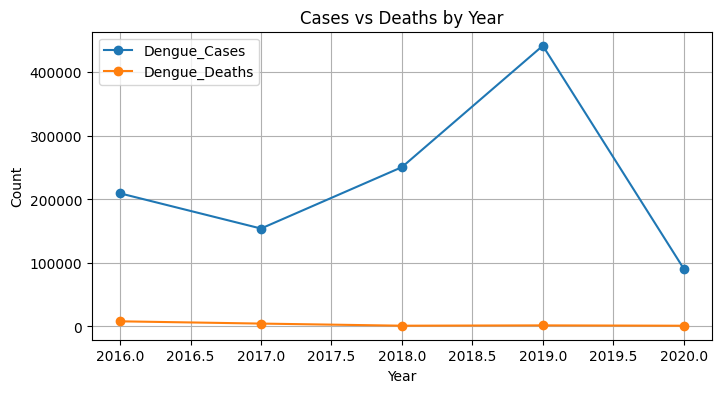

In [75]:
compare = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

compare.plot(figsize=(8,4), marker="o")
plt.title("Cases vs Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

<h4>INSIGHTS : While dengue cases rise and fall each year, dengue deaths remain much lower and generally show a decreasing trend over time. Even in years when the number of dengue cases increases, the number of deaths does not rise very high, suggesting improvements in medical treatment, faster diagnosis, and better awareness of symptoms. This alsp means that even dengue continues to spread, especially during outbreak years, health systems are becoming more effective at preventing severe cases and saving more lives. Overall, the comparison highlights progress in managing dengue, but it also shows the need to keep strengthening prevention and control efforts to reduce both cases and deaths.</h4>

In [96]:

dengue["Mortality_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]

x_year = dengue['Year'].values.reshape(-1, 1)
y_mortality = dengue['Mortality_Rate'].values.reshape(-1, 1)

model_mortality_year = LinearRegression()
model_mortality_year.fit(x_year, y_mortality)

r_squared_mortality_year = model_mortality_year.score(x_year, y_mortality)

print(f"R-squared (Mortality vs Year): {r_squared_mortality_year: .4f}")
print(f"Coefficient (Change in Mortality per Year): {model_mortality_year.coef_[0][0]: .6f}")


R-squared (Mortality vs Year):  0.0030
Coefficient (Change in Mortality per Year): -0.007624


<h4>INSIGHTS: Dengue mortality rate has a small change over the years. If the coefficient is negative, it means deaths compared to cases are slowly decreasing, suggesting that healthcare and treatment are improving. The R-squared value is likely low, which means the year alone does not fully explain changes in mortality, because other factors like healthcare access, weather, and outbreaks also affect it. Overall, dengue deaths are becoming less common relative to the number of cases, but prevention and treatment efforts are still important.</h4>

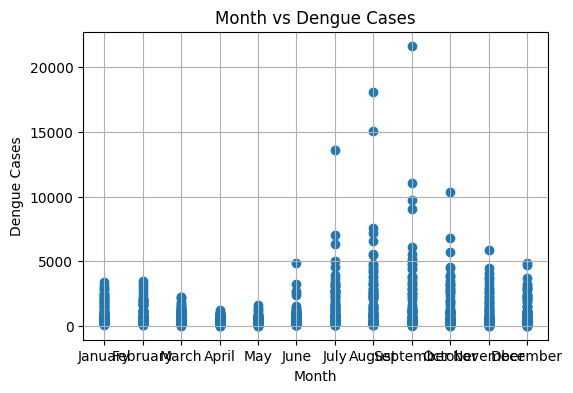

In [77]:
plt.figure(figsize=(6,4))
plt.scatter(dengue["Month"], dengue["Dengue_Cases"])
plt.title("Month vs Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.grid(True)
plt.show()

<h4>INSIGHTS : Dengue cases change across the months. There are more cases in the middle of the year, which is usually the rainy season when mosquitoes breed more. There are fewer cases at the start and end of the year, during the dry months. This means dengue happens more in rainy months, and people should clean their surroundings and take care to prevent mosquitoes, especially before and during the rainy season.</h4>

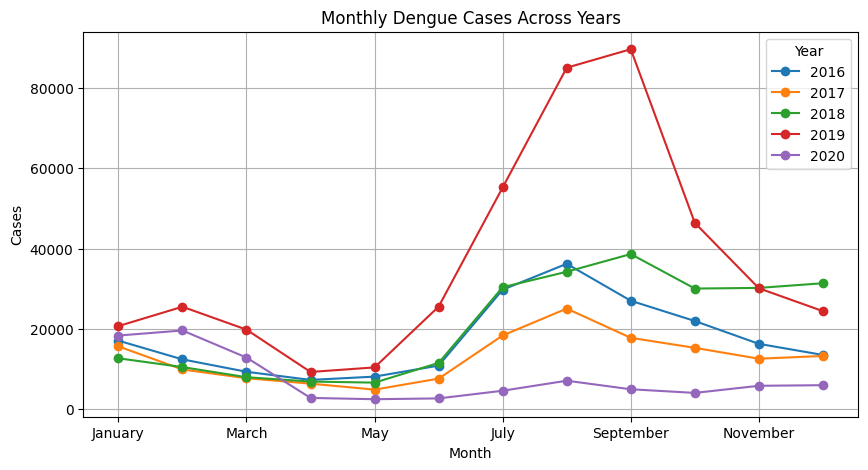

In [79]:
month_year = dengue.pivot_table(values="Dengue_Cases", index="Month", columns="Year", aggfunc="sum")

month_year.plot(figsize=(10,5), marker="o")
plt.title("Monthly Dengue Cases Across Years")
plt.xlabel("Month")
plt.ylabel("Cases")
plt.grid(True)
plt.show()

<h4>INSIGHTS: Dengue cases change every month for different years. Most years have higher cases in the middle months, which is usually the rainy season when mosquitoes breed more. The early and late months often have fewer cases during the dry season. Comparing different years, some years have more dengue cases overall, while others have fewer, which could be because of better prevention, awareness, or weather differences. This shows that dengue is seasonal, and communities should focus on cleaning surroundings and controlling mosquitoes before and during the rainy season.</h4>

R-squared: 0.003635812613011047


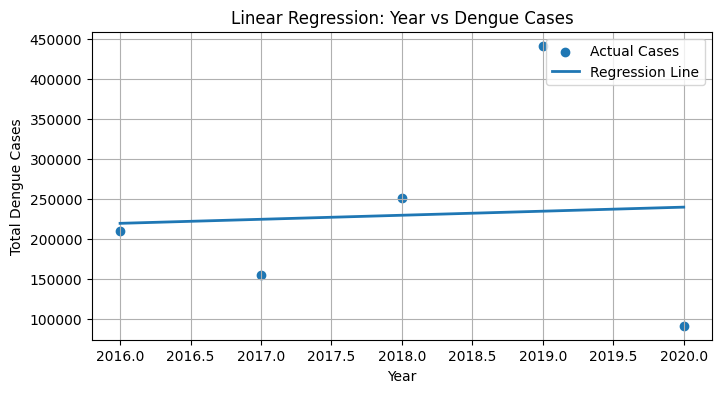

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_year = dengue.groupby("Year")["Dengue_Cases"].sum().reset_index()

X = df_year["Year"].values.reshape(1, -1).T
y = df_year["Dengue_Cases"].values.reshape(1, -1).T


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("R-squared:", r2)

plt.figure(figsize=(8,4))
plt.scatter(df_year["Year"], df_year["Dengue_Cases"], label="Actual Cases")
plt.plot(df_year["Year"], y_pred, linewidth=2, label="Regression Line")
plt.title("Linear Regression: Year vs Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.legend()
plt.grid(True)
plt.show()

<h4>INISGHTS : The linear regression shows the trend of dengue cases over the years. The R-squared value tells how well the line fits the data. If the line slopes upward, it means dengue cases are increasing over time. If it slopes downward, cases are decreasing. In many cases, dengue numbers go up and down each year, so the line may not perfectly fit, which the R-squared value shows. Overall, the regression helps see the general trend, but yearly changes still depend on weather, prevention efforts, and other factors.</h4>

R-squared: 0.21688904251715435


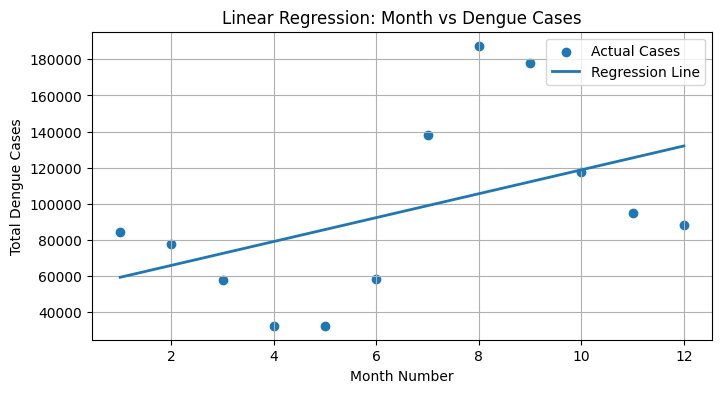

In [84]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

dengue["Month_Num"] = dengue["Month"].map(month_mapping)

df_month = dengue.groupby("Month_Num")["Dengue_Cases"].sum().reset_index()

X = df_month["Month_Num"].values.reshape(-1, 1)
y = df_month["Dengue_Cases"].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("R-squared:", r2)

plt.figure(figsize=(8,4))
plt.scatter(df_month["Month_Num"], df_month["Dengue_Cases"], label="Actual Cases")
plt.plot(df_month["Month_Num"], y_pred, label="Regression Line", linewidth=2)
plt.title("Linear Regression: Month vs Dengue Cases")
plt.xlabel("Month Number")
plt.ylabel("Total Dengue Cases")
plt.grid(True)
plt.legend()
plt.show()

<h4>INSIGHTS : The regression shows the general trend of dengue cases across the months. The R-squared value tells us how closely the line matches the real data. In most cases, the number of dengue cases rises during the rainy months (middle of the year) and falls in the dry months (start and end of the year). The linear trend line may not fit perfectly because dengue is seasonal, not strictly linear. Overall, this helps us see that dengue tends to increase around the rainy season, so communities should prepare by controlling mosquitoes and cleaning surroundings before and during these months.</h4>

R-squared: 0.1807155993883136


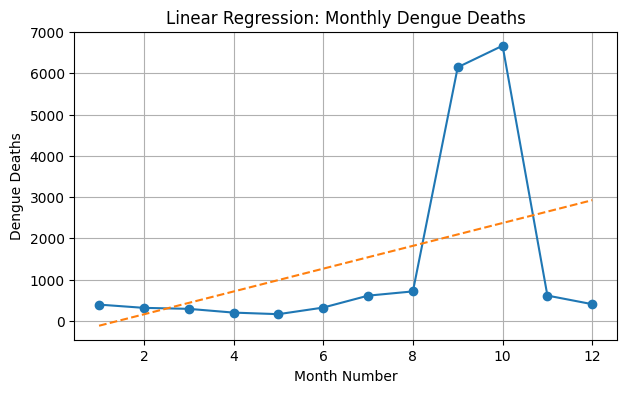

In [87]:
dengue["Month_Num"] = pd.to_datetime(dengue["Month"], format="%B").dt.month


dengue_month = dengue.groupby("Month_Num")["Dengue_Deaths"].sum().reset_index()


X = dengue_month["Month_Num"].values.reshape(-1, 1)
y = dengue_month["Dengue_Deaths"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


r2 = r2_score(y, y_pred)
print("R-squared:", r2)

plt.figure(figsize=(7,4))
plt.plot(dengue_month["Month_Num"], dengue_month["Dengue_Deaths"], marker="o")
plt.plot(dengue_month["Month_Num"], y_pred, linestyle="--")
plt.title("Linear Regression: Monthly Dengue Deaths")
plt.xlabel("Month Number")
plt.ylabel("Dengue Deaths")
plt.grid(True)
plt.show()

<h4>INISGHTS : The plot shows that dengue deaths change across the months. Usually, deaths are higher in the middle of the year during the rainy season and lower in the dry months at the start and end of the year. The regression line shows a general trend, but it may not fit perfectly because deaths are seasonal, not perfectly linear. Overall, the trend suggests that even though dengue deaths vary each month, communities and healthcare systems should focus on preparing for the rainy months to reduce deaths.</h4>

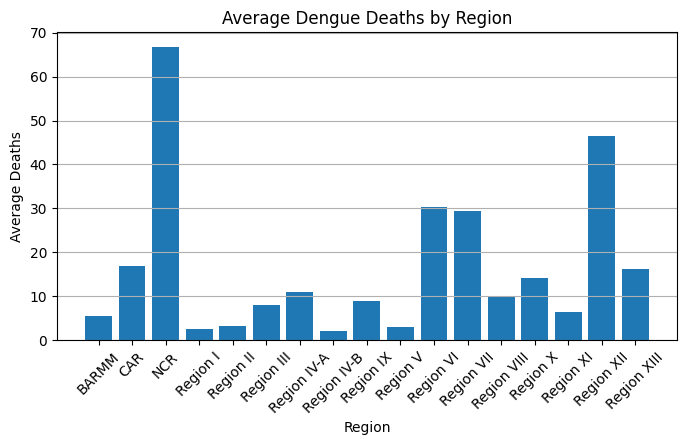

In [89]:

region_mortality = dengue.groupby("Region")["Dengue_Deaths"].mean().reset_index()

plt.figure(figsize=(8,4))
plt.bar(region_mortality["Region"], region_mortality["Dengue_Deaths"])
plt.title("Average Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Average Deaths")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


<h4>INSIGHTS: The chart highlights which regions suffer the highest dengue mortality. This helps identify priority areas where hospitals may need more support or where mosquito control programs should be strengthened. Comparing regions with high cases but lower deaths can also reveal differences in healthcare access and effectiveness of treatment, showing which areas manage dengue better and which need more interventions.</h4>

In [91]:
dengue["Mortality_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]

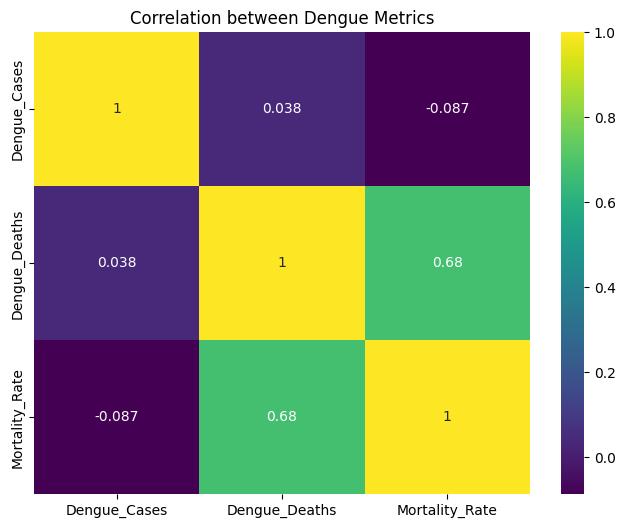

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(
    dengue[["Dengue_Cases", "Dengue_Deaths", "Mortality_Rate"]].corr(), 
    annot=True, 
    cmap="viridis"
)
plt.title("Correlation between Dengue Metrics")
plt.show()

<h4>INSIGHTS: The heatmap shows how dengue cases, deaths, and mortality rate are related. A strong positive correlation between cases and deaths means that when the number of dengue cases goes up, deaths also tend to increase. The mortality rate may not always rise with cases, which shows that healthcare, treatment, and prevention can reduce deaths even if cases are high. Overall, the heatmap helps us understand how these metrics interact and where improvements in healthcare can make the biggest difference.</h4>